#### One-qubit Hamiltonian

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:06<00:00,  4.71it/s]


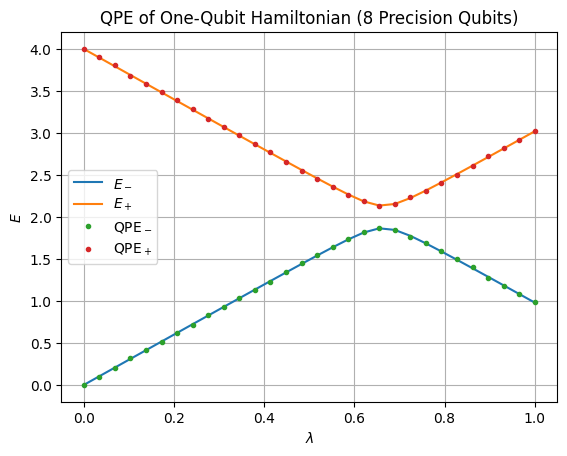

In [ ]:
import sys

from matplotlib import pyplot as plt
import numpy as np

sys.path.insert(0, "../../src/python")
from qpe import qpe_energy
from vqe_unary import hamiltonian, analytic_energies

lambdas = np.linspace(0, 1.0, 30)
precision = 8

energies_exact = analytic_energies(lambdas)
plt.plot(lambdas, energies_exact, label=("$E_-$", "$E_+$"))

labels = ("-", "+")

for i, l in enumerate(labels):
  qpe_energies, errors = qpe_energy(hamiltonian, lambdas, precision, i)
  plt.plot(
    lambdas, qpe_energies, marker=".", linestyle="None", label=rf"$\text{{QPE}}_{l}$"
  )

plt.xlabel(r"$\lambda$")
plt.ylabel(r"$E$")
plt.title(f"QPE of One-Qubit Hamiltonian ({precision} Precision Qubits)")
plt.grid(True)
plt.legend()
# plt.savefig("qpe_unary_result.pdf", format="pdf")
plt.show()

#### Two-Qubit Hamiltonian

100%|██████████| 30/30 [00:14<00:00,  2.12it/s]


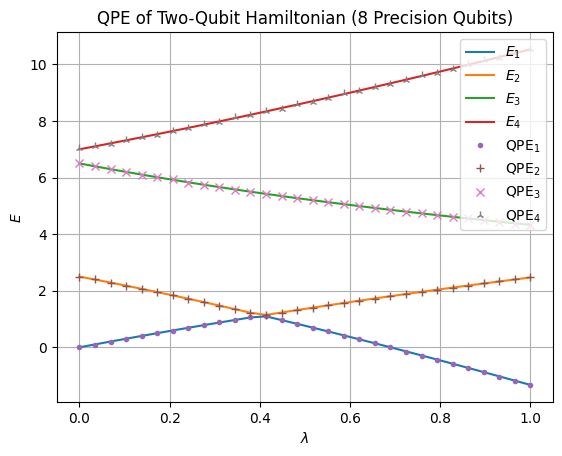

In [40]:
import sys

from matplotlib import pyplot as plt
import numpy as np

sys.path.insert(0, "../../src/python")
from qpe import qpe_energy
from vqe_binary import hamiltonian, exact_energies_and_entropies

lambdas = np.linspace(0, 1.0, 30)
precision = 8

energies_exact, _ = exact_energies_and_entropies(lambdas)
plt.plot(
  lambdas,
  energies_exact,
  label=[f"$E_{i + 1}$" for i in range(energies_exact.shape[1])],
)


scales = (1, 1, None, 0.1 * np.pi)
markers = (".", "+", "x", "2")

for i in range(4):
  qpe_energies, errors = qpe_energy(hamiltonian, lambdas, precision, i, scales[i])
  plt.plot(
    lambdas,
    qpe_energies,
    marker=markers[i],
    linestyle="None",
    label=rf"$\text{{QPE}}_{i + 1}$",
  )

plt.xlabel(r"$\lambda$")
plt.ylabel(r"$E$")
plt.title(f"QPE of Two-Qubit Hamiltonian ({precision} Precision Qubits)")
plt.grid(True)
plt.legend()
plt.savefig("qpe_binary_result.pdf", format="pdf")
plt.show()
